In [2]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Univariate Analysis

In [4]:
#summary statistics for the daaframe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Visualizations

In [5]:
#columns in the dataframe
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

<Figure size 1000x600 with 0 Axes>

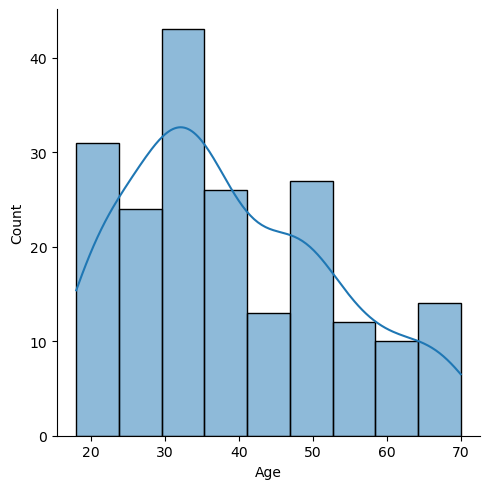

<Figure size 1000x600 with 0 Axes>

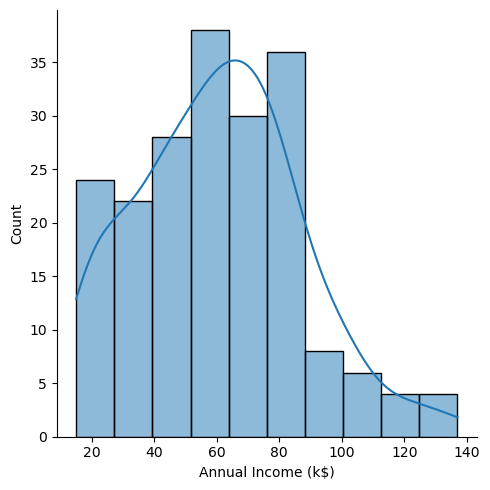

<Figure size 1000x600 with 0 Axes>

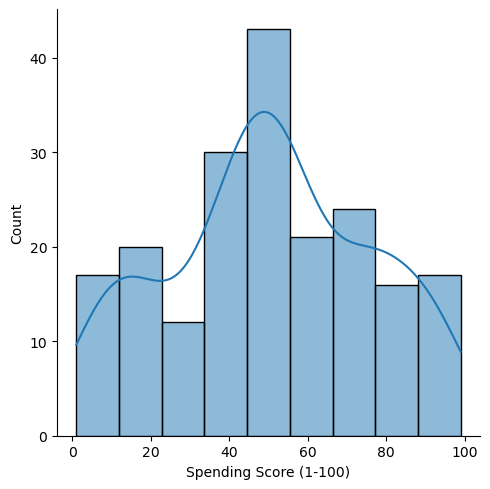

In [7]:
#numerical columns distribution
for i in columns:
    plt.figure(figsize=(10,6))
    sns.displot(df[i],kde=True)
    


In [8]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

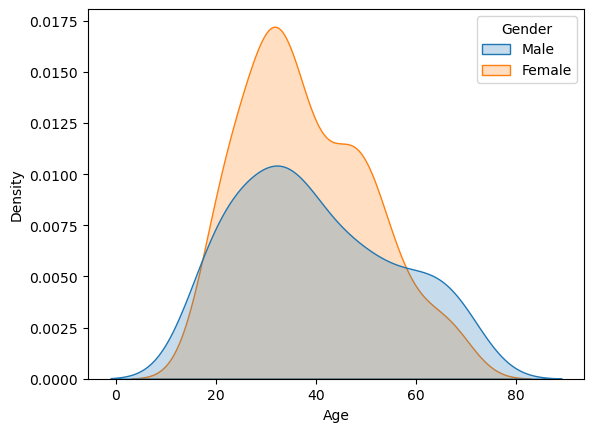

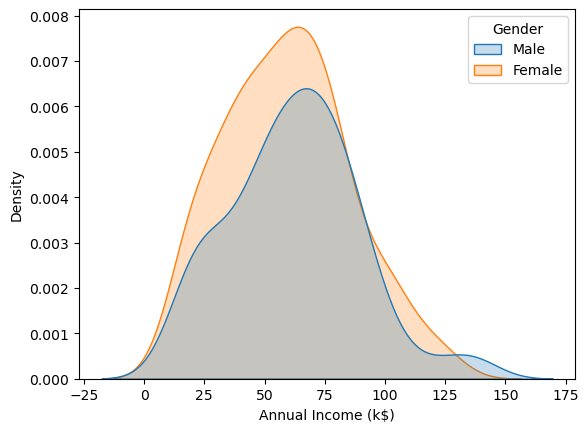

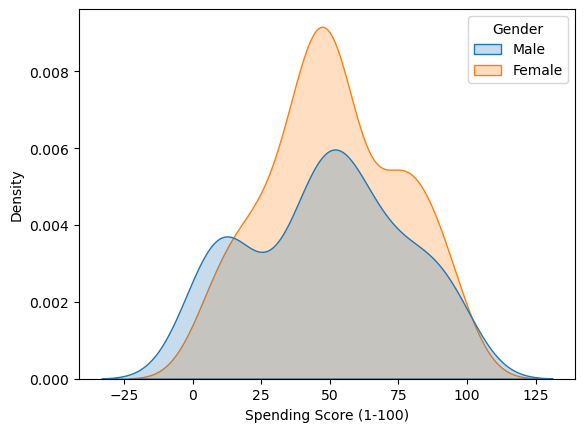

In [9]:
#kde plot for gender distribution in the numerical columns
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i,shade=True, hue=df['Gender'])
    


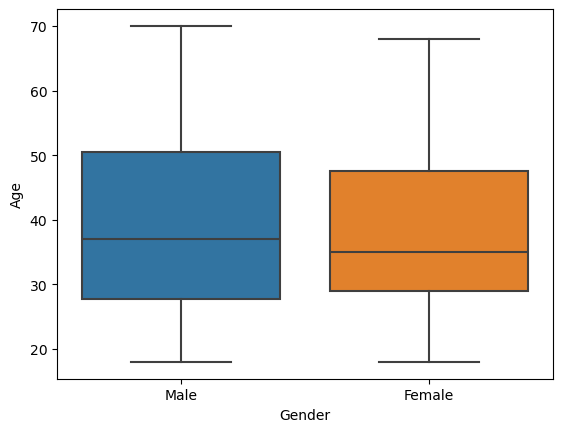

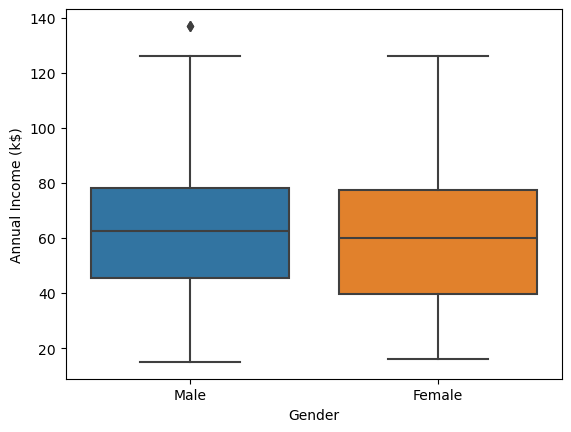

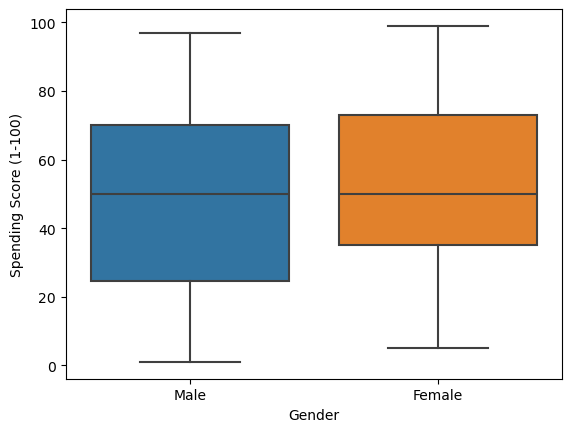

In [10]:
#box plot for gender distribution for numerical columns  
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

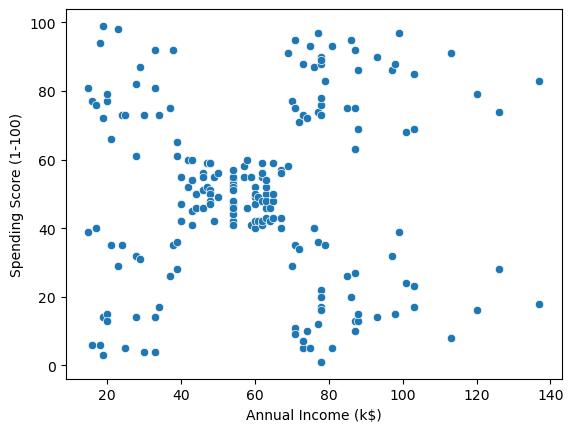

In [12]:
#scatter plt distribution
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

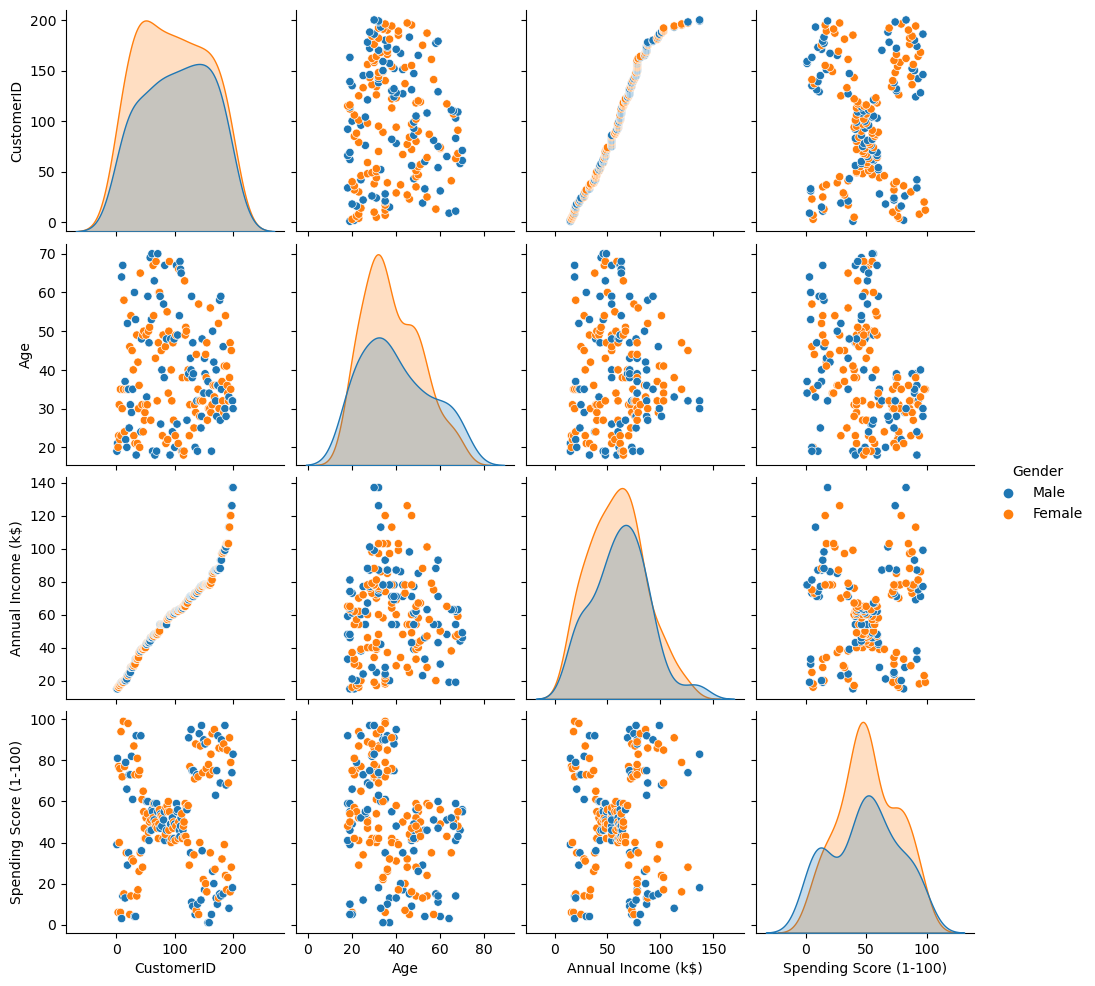

In [13]:
#pairplot distribution
sns.pairplot(df, hue='Gender')

In [15]:
#correlation matrix for the numerical columns
corr_matrix=df.select_dtypes(include='number').corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

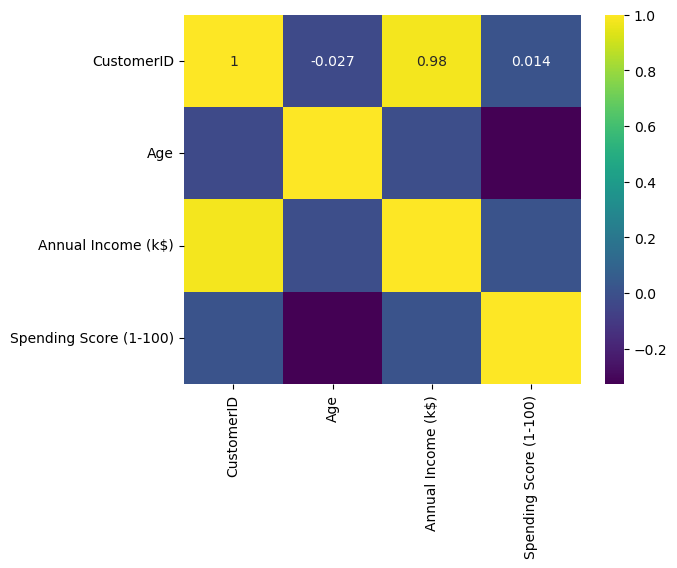

In [35]:
#Heatmap distribution for the corerlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

Clustering Univariate, Bivariate, Multivariate

In [28]:
# Initializing the KMeans clustering
from sklearn.cluster import KMeans
Clustering1=KMeans(n_clusters=3)

In [29]:
#fitting the data into the model
Clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [30]:
Clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [31]:
#Assigning the labels to a new column in the dataframe
df['Income Cluster']=Clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [32]:
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [104]:
#Accessing the inertia of the KMeans clustering model.
Clustering1.inertia_

23517.330930930926

In [34]:
# Initializing an empty list to store inertia scores for KMeans clustering.
inertia_scores=[]
# Iterating over a range of cluster numbers from 1 to 10 for each number of clusters (i):
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [35]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2862.833028083028,
 2168.4787157287155,
 1767.6406204906204]

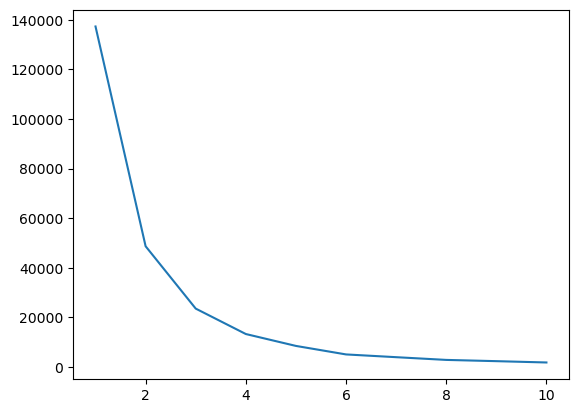

In [27]:
#plotting the inertia scores for the clusters
plt.plot(range(1,11),inertia_scores)

Our elbow is at three so our data will have three clusters. So we rerun our code again.

In [36]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [42]:
#Grouping the numerocal columns for the mean values
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [50]:
## Initializing the KMeans clustering algorithm with 5 clusters.
Clustering2=KMeans(n_clusters=5)
#fitting the model with the target features
Clustering2.fit(df[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
#checking for the generated clusters
Clustering2.labels_
#Assigning the labels to a new column in the dataframe
df['Income and spending Cluster']=Clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and spending Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


In [46]:
# Initializing an empty list to store inertia scores for KMeans clustering with two features.
inertia_scores2=[]
# Iterating over a range of cluster numbers from 1 to 10 for each number of clusters (i):
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(means2.inertia_)

In [47]:
inertia_scores2

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25029.25342493588,
 21830.041978049438,
 19653.383606248826]

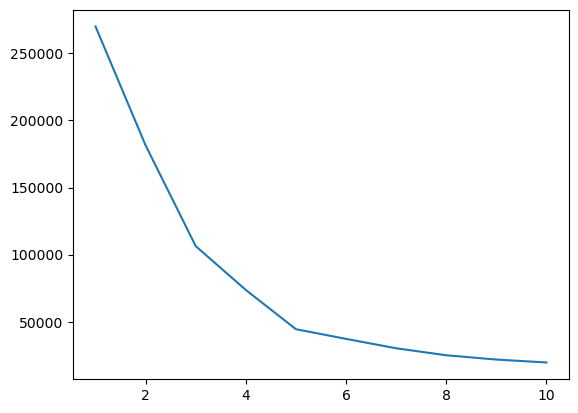

In [52]:
# Plotting the inertia scores 
plt.plot(range(1,11),inertia_scores2)

In [96]:
# Retrieving the coordinates of the cluster centers from the fitted KMeans model.
centers=Clustering2.cluster_centers_
centers

array([[43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739]])

In [97]:
#Assigning the the centroids in a dataframe
centroids=pd.DataFrame(centers)
centroids

,0,1,2
0,43.088608,55.291139,49.569620
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,25.521739,26.304348,78.565217


In [98]:
centroids=centroids.drop(columns=[0])
centroids

,1,2
0,55.291139,49.569620
1,86.538462,82.128205
2,87.750000,17.583333
3,26.304348,20.913043
4,26.304348,78.565217


In [99]:
# Renaming the columns of the centroids DataFrame to 'x' and 'y'.
centroids.columns=['x','y']

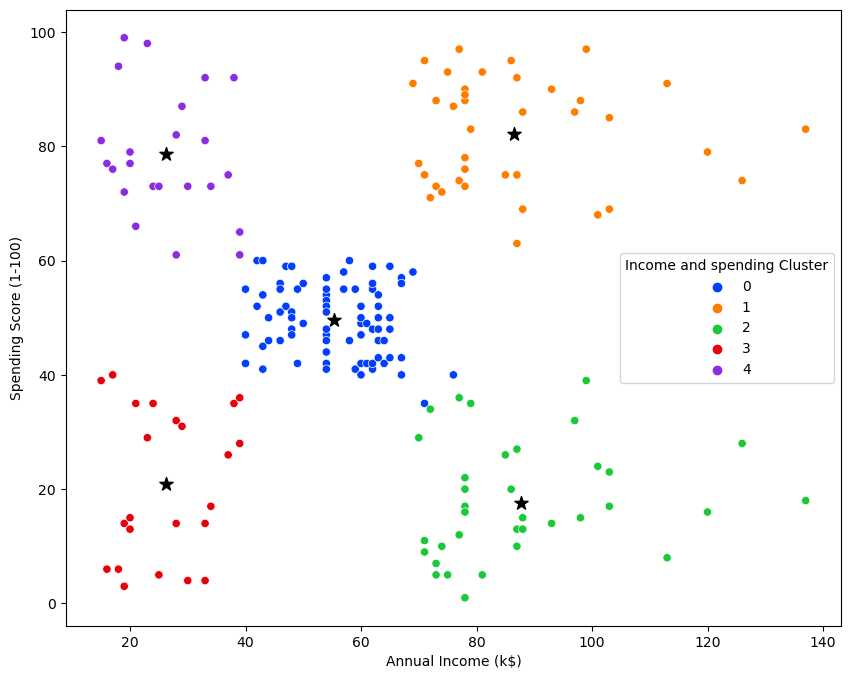

In [100]:
#Creating a scatter plot of 'Annual Income (k$)' vs. 'Spending Score (1-100)'.
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income and spending Cluster',palette='bright')
plt.scatter(x=centroids['x'],y=centroids['y'],s=100,c='black',marker='*')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

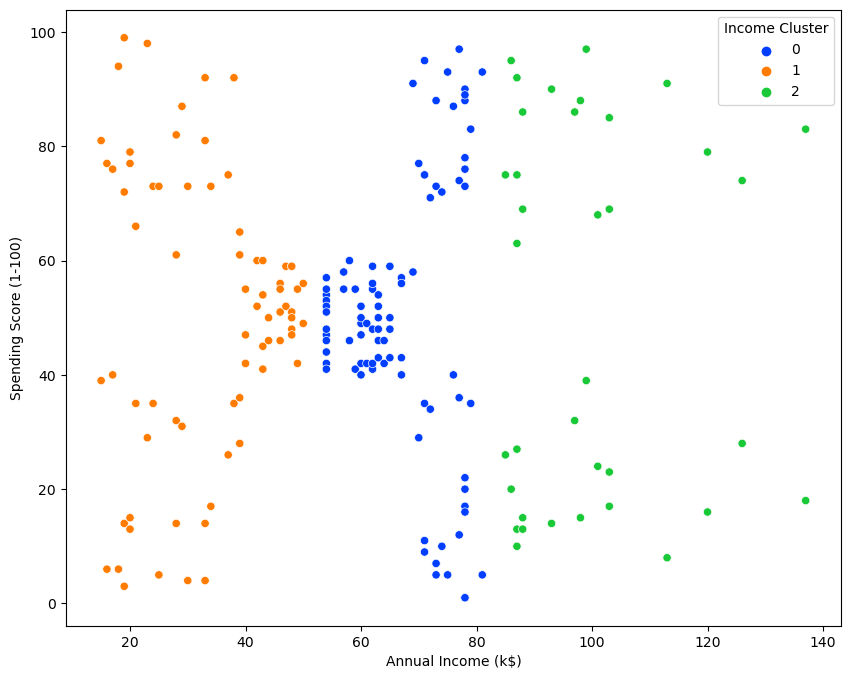

In [69]:
# Creating a scatter plot of 'Annual Income (k$)' vs. 'Spending Score (1-100)'.
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income Cluster',palette='bright')

In [101]:
#Creating a normalized crosstab to analyze the relationship between income and spending clusters and gender
pd.crosstab(df['Income and spending Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Income and spending Cluster,,
0,0.582278,0.417722
1,0.538462,0.461538
2,0.472222,0.527778
3,0.608696,0.391304
4,0.608696,0.391304


In [105]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Income and spending Cluster'],
      dtype='object')

In [108]:
df.groupby('Income and spending Cluster')[['Age', 'Annual Income (k$)',
'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and spending Cluster,,,
0,43.088608,55.291139,49.569620
1,32.692308,86.538462,82.128205
2,40.666667,87.750000,17.583333
3,45.217391,26.304348,20.913043
4,25.521739,26.304348,78.565217


In [109]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [110]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Income and spending Cluster'],
      dtype='object')

In [111]:
df2=df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [116]:
#using one hot encoding to convert the gender column
df2=pd.get_dummies(df2,drop_first=True)
# Convert True/False to 1/0 for the entire DataFrame
df2 = df2.astype(int)
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [119]:
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [121]:
df2=scale.fit_transform(df2)
df2

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [126]:
df2=pd.DataFrame(df2)
df2

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [127]:
# Initializing an empty list to store inertia scores for KMeans clustering with two features.
inertia_scores3=[]
# Iterating over a range of cluster numbers from 1 to 10 for each number of clusters (i):
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)

In [128]:
inertia_scores3

[800.0,
 588.8026767824934,
 476.7875544135159,
 388.7178614053845,
 325.7462338542557,
 275.030671001447,
 235.67727615326726,
 200.32586220316577,
 174.18800022186804,
 152.0867629871069]

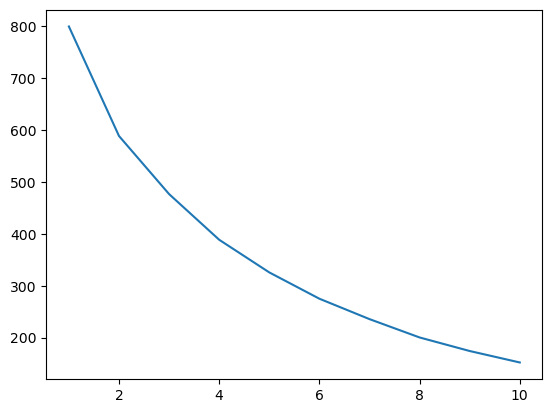

In [130]:
plt.plot(range(1,11),inertia_scores3)

INTERPRETATION

~ Cluster 1 has a high spending score and high score which means it can be a very good target group.

~ Cluster 1 has 54% of the shoppers as female which means a marketing campaign can be initiated targeting this popular items in this cluster.

~ Cluster 2 represents an interesting opportunity to market to the customers for sales events such as black friday on popular items.
